In [1]:
import pandas as pd
import numpy as np
import bbgclient
import dfutils
import datetime
import bbgclient
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [2]:
#def get_shareholder_parsed_df(df):
    #if len(df) == 0: return "ERROR: empty HDS file"
    #df.dropna(inplace=True)
    #df.columns = ['Holder Name', 'Portfolio Name', 'Position', 'Position Change', 'Filing Date', 'Filing Source',
                  #'Insider Status', 'Percent Outstanding', 'Percent of Portfolio', 'Institution Type', 'Metro Area',
                 #'Country']
    #df.drop(df.index[:1], inplace=True)  # delete first row
    #df['Percent Outstanding'] = df['Percent Outstanding'].astype(float)
    #if df.loc[df.index[0]]['Insider Status'] == 'N-C':  return "ERROR. HDS file starts with a child"
    #return df

In [3]:
def get_shareholder_summary(ticker):
    shareholders_summary = bbgclient.bbgclient.get_secid2field([ticker],"tickers",["ALL_HOLDERS_PUBLIC_FILINGS"], req_type='refdata')

    holder_name, portfolio_name, inst_type, insider_status, filing_dt, filing_source, pct_out, position, position_chg = [], [], [], [], [], [], [], [], []

    for i in shareholders_summary[ticker]['ALL_HOLDERS_PUBLIC_FILINGS']:
        holder_name.append(i['Holder Name '])
        portfolio_name.append(i['Portfolio Name '])
        inst_type.append(i['Institution Type '])
        insider_status.append(i['Insider Status '])
        filing_dt.append(i['Filing Date  '])
        filing_source.append(i['Filing Source '])
        pct_out.append(i['Percent Outstanding'])
        position.append(i['Position '])
        position_chg.append(i['Position Change  '])
    
    shareholder_summary_df = shareholders_summary_df = pd.DataFrame()

    shareholder_summary_df["Holder Name"] = holder_name
    shareholder_summary_df["Portfolio Name"] = portfolio_name
    shareholder_summary_df["Institution Type"] = inst_type
    shareholder_summary_df["Insider Status"] = insider_status
    shareholder_summary_df["Filing Date"] = filing_dt
    shareholder_summary_df["Filing Source"] = filing_source
    shareholder_summary_df["Percent Outstanding"] = [float(i) for i in pct_out]
    shareholder_summary_df["Position"] = [float(i) for i in position]
    shareholder_summary_df["Position Change"] = [float(i) for i in position_chg]

    shareholder_summary_df = shareholder_summary_df.drop_duplicates()
    shareholder_summary_df = shareholder_summary_df[shareholder_summary_df["Percent Outstanding"] != 0]
    
    return shareholder_summary_df

In [4]:
def shareholder_analysis_df(ticker):
    raw_df = get_shareholder_summary("RAMP US EQUITY")
    #parsed_df = get_shareholder_parsed_df(raw_df)
    res_df = pd.DataFrame(columns=raw_df.columns)
    n = len(raw_df.index)
    k = 0; w = 0  
    while k < n:
        row = raw_df.loc[raw_df.index[k]].copy()
        if row['Insider Status'] == 'Y':
            row['Insider Status'] = 'Insider'
            row['Institution Type'] = 'Insider'
        res_df.loc[w] = row
        w += 1
        k += 1
        while k < n and raw_df.loc[raw_df.index[k]]['Insider Status'] == 'N-C': #skip children
            k += 1

    included_cols = ['Holder Name', 'Portfolio Name', 'Position', 'Position Change', 'Filing Date', 'Filing Source',
                     'Insider Status', 'Percent Outstanding', 'Institution Type']
    res_df = res_df[included_cols]
    res_df = res_df[res_df['Percent Outstanding']>0].copy()

    res_df['Filing Date'] = res_df['Filing Date'].apply(lambda x: pd.to_datetime(x).strftime("%Y-%m-%d"))
    res_df = res_df[res_df["Insider Status"] != "Insider"]
    return res_df

In [5]:
shareholder_df = shareholder_analysis_df('RAMP US EQUITY')
shareholder_df

,Holder Name,Portfolio Name,Position,Position Change,Filing Date,Filing Source,Insider Status,Percent Outstanding,Institution Type
0,BlackRock Inc,n/a,8520819.0,0.0,2018-12-31,13G,N-P,12.49,Investment Advisor
1,Jackson Square Partners LLC,n/a,7339769.0,0.0,2018-12-31,13G,N-P,10.76,Investment Advisor
2,Vanguard Group Inc/The,n/a,6287089.0,0.0,2018-12-31,ULT-AGG,N-P,9.21,Investment Advisor
3,Capital Group Cos Inc/The,Capital Group Cos Inc/The,3262400.0,849300.0,2018-12-31,13F,N-P,4.78,Investment Advisor
4,Dimensional Fund Advisors LP,Dimensional Fund Advisors LP,3066256.0,-93069.0,2018-12-31,13F,N-P,4.49,Investment Advisor
5,Manning & Napier Group LLC,Manning & Napier Group LLC,2758720.0,2758720.0,2018-12-31,13F,N-P,4.04,Investment Advisor
6,State Street Corp,n/a,2230231.0,-314999.0,2018-12-31,ULT-AGG,N-P,3.27,Investment Advisor
7,Abrams Bison Investments LLC,Abrams Bison Investments LLC,2112000.0,-343000.0,2018-12-31,13F,N-P,3.10,Hedge Fund Manager
8,Millennium Management LLC/NY,Millennium Management LLC/NY,2094935.0,2094935.0,2018-12-31,13F,N-P,3.07,Hedge Fund Manager
9,Northern Trust Corp,Northern Trust Corp,1799115.0,410790.0,2018-12-31,13F,N-P,2.64,Investment Advisor


In [6]:
def sort_by_institution(shareholder_df):
    sort_by_inst_type = shareholder_df.groupby('Institution Type').sum().reset_index()[['Institution Type', 
                'Percent Outstanding']].sort_values(by='Percent Outstanding', ascending = False)
    total_pct_outstanding = sort_by_inst_type['Percent Outstanding'].sum()
    sort_by_inst_type = sort_by_inst_type.append({'Institution Type': 'Missing Data', 'Percent Outstanding': 100.0-total_pct_outstanding}, ignore_index = True)
    return sort_by_inst_type

sort_by_institution(shareholder_df)

,Institution Type,Percent Outstanding
0,Investment Advisor,88.87
1,Hedge Fund Manager,14.43
2,Private Equity,2.48
3,Bank,2.14
4,Insurance Company,1.34
5,Brokerage,1.23
6,Pension Fund,0.93
7,Government,0.77
8,Sovereign Wealth Fund,0.71
9,Holding Company,0.17


In [7]:
def parse_historical_data(df):
        df['Max Price'] = [(M3 if M3 is not None else M2 if M2 is not None else M1) for (M1,M2,M3) in zip(df['Max Price1'],df['Max Price2'],df['Max Price3'])]

        df = df[["Full Ticker","Min Price1","Max Price1","Min Price2","Max Price2","Min Price3","Max Price3","Acceptance Price"]]

        df['Max Price'] = [(M3 if not pd.isnull(M3) else (M2 if not pd.isnull(M2) else M1)) for (M1,M2,M3) in zip(df['Max Price1'],df['Max Price2'],df['Max Price3'])]
        df['Min Price'] = [(m3 if not pd.isnull(m3) else (m2 if not pd.isnull(m2) else m1)) for (m1,m2,m3) in zip(df['Min Price1'],df['Min Price2'],df['Min Price3'])]
        df["Acceptance Price"] = df["Acceptance Price"].astype(float)
        df["Min Price"] = df["Min Price"].astype(float)
        df["Max Price"] = df["Max Price"].astype(float)
        df["acc as %"] = (df["Acceptance Price"]-df["Min Price"])/(df["Max Price"]-df["Min Price"])
        df = df[~pd.isnull(df["acc as %"])]
        count , bins = np.histogram(df["acc as %"].values, bins=5)
        pr = count/sum(count)
        pdf = {a:p for (a,p) in zip(bins[1:],pr)}
        return pdf

In [8]:
def draw_sample(df, num_of_samples, min_price, max_price, inc):
    pdf = parse_historical_data(df)
    x_arr = list(pdf.keys())
    print(x_arr)
    samples = []
    for i in range(num_of_samples):
        r = np.random.uniform(0,1)
        k = 0
        F = 0
        while k < len(x_arr):
            F += pdf[x_arr[k]]
            if F >= r:
                prc = ((max_price-min_price)*np.random.uniform(x_arr[k-1] if k >= 1 else 0,x_arr[k])) + min_price
                incs = int((prc - int(prc))/inc)
                if (prc - int(prc))%inc >= (inc*0.5):
                    incs+=1
                samples.append(int(prc)+(inc*incs))
                break
            k += 1
    return samples

In [13]:
#usecols = ['Full Ticker', 'Min Price1', 'Max Price1', "Min Price2", 'Max Price2', 'Min Price3', "Max Price3", 
          #'Acceptance Price']
#historical_dt_data = pd.read_csv('DADB.csv', usecols = usecols)

#acc = draw_sample(historical_dt_data, num_simulations, min_price, max_price, increments)

In [14]:
def get_holder_tender2(historical_df, dist, pct_os, min_price, max_price, inc, num_trj):
    if dist['Distribution'] == 'Not participating':
        return np.zeros(num_trj), np.zeros(num_trj), np.zeros(num_trj)

    if dist['Distribution'] == 'Normal':
        mu = dist['Dist. Params']['mu']
        sigma = dist['Dist. Params']['sigma']
        q = pd.Series(np.random.normal(mu,sigma,num_trj)).apply(lambda x: max(min(x,1),0)).values
        p = draw_sample(historical_df, num_trj, min_price,max_price,inc)
        df = pd.DataFrame([(qj*pct_os, pj if qj > 0 else None, pct_os if qj>0 else 0) for (qj,pj) in zip(q,p)],columns = ["Q","P","E"])
        return df["Q"].values, df["P"].values, df["E"].values

    if dist['Distribution'] == 'Uniform':
        q = pd.Series(np.random.uniform(0,1,num_trj))
        p = draw_sample(historical_df, num_trj, min_price,max_price,inc)
        df = pd.DataFrame([(qj*pct_os, pj, pct_os) for (qj,pj) in zip(q,p)], columns = ["Q","P","E"])
        return df["Q"].values, df["P"].values, df["E"].values

    if dist['Distribution'] == 'Custom':
        pass

In [15]:
def calc_acceptance_price2(Q,P,min_price,max_price,inc,os_shares,deal_size_usd, shares_sought):
    for p_acc in [min_price + inc*i for i in range(int((max_price-min_price)/inc) + 1)]:
        pct_accepted = sum([q for (q,p) in zip(Q,P) if (p is not None and p <= p_acc)])
        num_shares_accepted = (pct_accepted/100.0)*os_shares
        if shares_sought != 0: deal_size_usd = p_acc*shares_sought
        if num_shares_accepted*p_acc >= deal_size_usd:
            return { "acceptance price": p_acc, "% of O/S accepted": pct_accepted, "Proration": 100.0*float(deal_size_usd)/(num_shares_accepted*p_acc), }
    #if under-subscribed then the acceptance price is the maximum of the range and there is no proration
    return {"acceptance price": max_price, "% of O/S accepted": sum(Q), "Proration": 100.0}

In [16]:
def analyze_auction2(df, historical_df, inst2dist, min_price, max_price, inc, numtrj):
    Q,P,E = [],[],[]
    for idx in df.index:
        row = df.loc[idx]
        holder_inst = row["Institution Type"]
        holder_pct_os = row['Percent Outstanding']
        inst_distributions = inst2dist[holder_inst]
        #holder_id = 'loc_'+str(idx)

        #Select either institution distribution or overriden distribution
        #inst_primary_dist = inst_distributions['Distribution']
        #overriden_dist = [ovrd_dist if ovrd_dist['OVERRIDE_ID']==holder_id else None for ovrd_dist in inst_distributions if 'OVERRIDE_ID' in ovrd_dist]
        #overriden_dist = [x for x in overriden_dist if x is not None]
        #dist = inst_primary_dist if len(overriden_dist) == 0 else overriden_dist[0]
        #dist = inst_primary_distz

        q,p,e = get_holder_tender2(historical_df, inst_distributions, holder_pct_os, min_price, max_price, inc, numtrj)
        Q.append(q); P.append(p); E.append(e)
    
    #handle missing data
    #dist = inst2dist['Missing Data'][0]
    #missing_pct_os = float(dist['Pct O/S'])
    #avg_holder_pct_os = df['Percent Outstanding'].sum()/float(len(df))
    #num_of_holders_in_missing_data = int(round(missing_pct_os/avg_holder_pct_os))
    #for i in range(num_of_holders_in_missing_data):
        #q,p,e = dt.get_holder_tender2(dist,avg_holder_pct_os,min_price,max_price,inc,numtrj)
        #Q.append(q); P.append(p); E.append(e)

    return np.array(Q),np.array(P),np.array(E)

In [17]:
def calc2(df, historical_df, inst2dist, deal_terms, company, as_of, numtrj=10000):
    #dt = dutch_analytics.DutchTender()
    p_vec, Q_vec, proration_vec, engagement_vec = [],[],[],[]
    min_price, max_price, inc = deal_terms["MIN PRICE"], deal_terms["MAX PRICE"], deal_terms["PRICE INC"]
    os_shares = deal_terms["SHARES OS"]
    deal_value_usd = deal_terms["DEAL DOLLAR VALUE"]
    shares_sought = deal_terms["SHARES SOUGHT"]

    if as_of != 'inception': #filtering required
        df = df[df['Filing Date']>=as_of].copy()

    Q,P,E = analyze_auction2(df, historical_df, inst2dist, min_price, max_price,inc, numtrj)
    
    for i in range(numtrj):
        dutch_res = calc_acceptance_price2(Q[:,i], P[:,i], min_price, max_price, inc,os_shares,deal_value_usd,shares_sought)
        p_vec.append(dutch_res["acceptance price"])
        Q_vec.append(dutch_res["% of O/S accepted"])
        proration_vec.append(dutch_res["Proration"])
        engagement_vec.append(sum(E[:,i]))

    return Q_vec, p_vec, proration_vec, engagement_vec

In [18]:
#historical_dutch_tender_data = pd.read_csv('DADB.csv')
#RAMP_share_holders = pd.read_csv('RAMP .csv')
#RAMP_share_holders

In [19]:
num_simulations = 100
min_price = 44.50
max_price = 49
increments = 0.10
shares_os = 1125
shares_sought = 0
deal_dollar_value = 500
#announcement date
#end date
company = "RAMP US EQUITY"

as_of = '2018-09-30'

deal_terms = {
    'MIN PRICE': min_price,
    'MAX PRICE': max_price,
    'PRICE INC': increments,
    'SHARES OS': shares_os,
    'SHARES SOUGHT': shares_sought,
    'DEAL DOLLAR VALUE': deal_dollar_value
}

### THIS IS THE PART THAT NEEDS TO CHANGE### - very subjective as of right now
    ### How does the user determine the distribution currently?
## Is there a way to use hsitorical data to determine the distribution and associated parameters????
institution_type = ['Investment Advisor', 'Hedge Fund Manager', 'Pension Fund', 'Private Equity', 'Bank', 'Insurance Company', 
                    'Brokerage', 'Government', 'Sovereign Wealth Fund', 'Holding Company', 'Unclassified', 'Endowment', 
                    'Foundation', 'Other']
pct_os_by_inst = [75.95, 11.89, 4.13, 2.73, 1.63, 1.54, 1.04, 0.69, 0.62, 0.14, 0.08, 0.06, 0.03, 0.01]

inst_dict = {}
for x in range(0, len(institution_type)):
    inst2dist = {
        'Distribution': 'Normal',
        'Dist. Params': {'mu': 0.5, 'sigma': 0.10 },
        'Pct O/S': pct_os_by_inst[x]
    }
    inst_dict[institution_type[x]] = inst2dist

inst_dict

{'Investment Advisor': {'Distribution': 'Normal',
  'Dist. Params': {'mu': 0.5, 'sigma': 0.1},
  'Pct O/S': 75.95},
 'Hedge Fund Manager': {'Distribution': 'Normal',
  'Dist. Params': {'mu': 0.5, 'sigma': 0.1},
  'Pct O/S': 11.89},
 'Pension Fund': {'Distribution': 'Normal',
  'Dist. Params': {'mu': 0.5, 'sigma': 0.1},
  'Pct O/S': 4.13},
 'Private Equity': {'Distribution': 'Normal',
  'Dist. Params': {'mu': 0.5, 'sigma': 0.1},
  'Pct O/S': 2.73},
 'Bank': {'Distribution': 'Normal',
  'Dist. Params': {'mu': 0.5, 'sigma': 0.1},
  'Pct O/S': 1.63},
 'Insurance Company': {'Distribution': 'Normal',
  'Dist. Params': {'mu': 0.5, 'sigma': 0.1},
  'Pct O/S': 1.54},
 'Brokerage': {'Distribution': 'Normal',
  'Dist. Params': {'mu': 0.5, 'sigma': 0.1},
  'Pct O/S': 1.04},
 'Government': {'Distribution': 'Normal',
  'Dist. Params': {'mu': 0.5, 'sigma': 0.1},
  'Pct O/S': 0.69},
 'Sovereign Wealth Fund': {'Distribution': 'Normal',
  'Dist. Params': {'mu': 0.5, 'sigma': 0.1},
  'Pct O/S': 0.62},
 '

In [20]:
usecols = ['Full Ticker', 'Min Price1', 'Max Price1', "Min Price2", 'Max Price2', 'Min Price3', "Max Price3", 
          'Acceptance Price']
historical_dt_data = pd.read_csv('DADB.csv', usecols = usecols)

shareholder_df = shareholder_analysis_df(company)

In [21]:
historical_dt_data['Acceptance Price'][100]

17.0

In [22]:
accp_price_vector = draw_sample(historical_dt_data, num_simulations, min_price, max_price, increments)

[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]


In [23]:
pct_accepted, accp_price, proration, engagement = calc2(shareholder_df, historical_dt_data, inst_dict, deal_terms, company, as_of, 100)

[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[0.2, 0.4, 0.600

In [24]:
pct_accepted

[1.3477135627845542,
 1.4809253172018582,
 6.518827141363713,
 2.74801405512363,
 1.4654143961501696,
 1.0890531842045181,
 2.169558301559046,
 4.4315438993496885,
 9.25590080156036,
 1.9600346455932567,
 1.7842590557599087,
 1.2843036762433486,
 2.7120262092957765,
 1.404625930646895,
 2.581152752596559,
 3.9148559102808598,
 5.434270016167394,
 1.1445327384128303,
 1.0485680351754978,
 1.1714448829022373,
 2.4766255787871168,
 1.4519330760104912,
 2.3698443612395805,
 1.1483042112270665,
 8.765986922882952,
 1.1653209411073837,
 7.048507759538191,
 2.4996291569650255,
 1.5126728243363239,
 1.5473638460164594,
 3.2367684604866667,
 1.0450862960246121,
 3.001499654028173,
 3.113804925423887,
 3.0978268812277396,
 1.8359162914485314,
 1.1796876256692088,
 1.0078709861487578,
 2.5616425021184646,
 2.3277000438696374,
 2.1864056703202226,
 1.166563738077915,
 1.3376096399751147,
 1.0810472368056985,
 1.1297679349264986,
 3.7640046276774606,
 2.447371444207326,
 2.0492360686509103,
 2.9625

In [25]:
accp_price

[44.7,
 44.7,
 44.7,
 44.7,
 45.1,
 44.6,
 44.5,
 44.6,
 44.7,
 44.7,
 44.5,
 44.7,
 44.6,
 44.8,
 44.6,
 44.5,
 44.5,
 44.8,
 44.5,
 44.5,
 44.5,
 44.7,
 44.7,
 44.7,
 44.6,
 44.7,
 44.7,
 44.8,
 44.6,
 44.7,
 44.5,
 44.5,
 44.5,
 44.6,
 44.7,
 44.6,
 44.6,
 44.6,
 44.6,
 44.8,
 44.5,
 44.6,
 44.7,
 44.5,
 45.0,
 44.9,
 44.5,
 44.9,
 44.6,
 44.6,
 44.6,
 44.5,
 44.9,
 44.9,
 44.6,
 44.6,
 44.8,
 44.6,
 44.6,
 44.7,
 44.7,
 44.7,
 44.8,
 44.8,
 44.8,
 44.5,
 44.7,
 44.8,
 44.6,
 44.9,
 44.7,
 44.9,
 44.5,
 44.8,
 44.6,
 44.6,
 44.5,
 44.6,
 44.5,
 44.6,
 44.6,
 44.7,
 44.6,
 44.6,
 44.6,
 44.6,
 44.7,
 44.8,
 44.7,
 44.6,
 44.6,
 44.7,
 44.5,
 44.6,
 44.6,
 44.6,
 44.8,
 44.7,
 44.8,
 44.5]

In [26]:
proration

[73.77553368411493,
 67.13929878355765,
 15.252481035561011,
 36.18187001713762,
 67.24817244101648,
 91.50262096726027,
 46.03478781057001,
 22.48679534508895,
 10.74215135613692,
 50.72782135320664,
 55.97570360229721,
 77.41805087608489,
 36.744195312673625,
 70.62830540274885,
 38.60725430806367,
 25.511834495018768,
 18.378762144279662,
 86.67847225053838,
 95.24909467435303,
 85.25809238885583,
 40.327111578910284,
 68.47993822205068,
 41.95561910054847,
 86.58706149087648,
 11.367940838164136,
 85.32266420379051,
 14.106288981976636,
 39.688426953221565,
 65.8775771761321,
 64.25656616168142,
 30.856441316137435,
 95.56642014620701,
 33.275084979901145,
 32.003039083730734,
 32.09614066888874,
 54.278738737499545,
 84.47254896899011,
 98.87299277086818,
 38.90129893029292,
 42.619902623460725,
 45.68006633476373,
 85.42286844235697,
 74.33281308409246,
 92.38741162693742,
 87.42099067025741,
 26.29789531226719,
 40.80915313910582,
 48.303561101536204,
 33.63688574049866,
 61.038

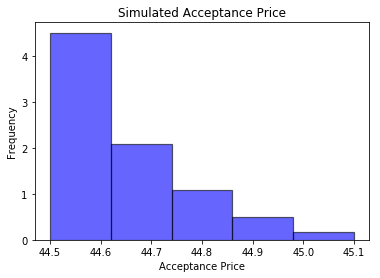

In [27]:
#Creating histograms of the data - adding best fit lines
n, bins, patches = plt.hist(accp_price, 5, density=1, facecolor='blue', linewidth = 1.2, edgecolor = 'black', alpha = 0.6)
plt.xlabel("Acceptance Price")
plt.ylabel('Frequency')
plt.title('Simulated Acceptance Price')
plt.show()

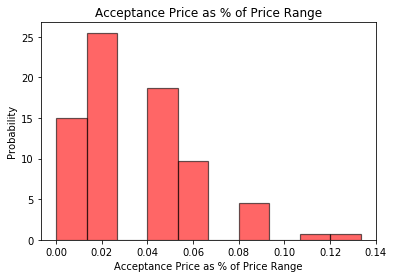

In [28]:
acceptance_price_as_pcnt = [(i - min_price)/(max_price - min_price) for i in accp_price]
n, bins, patches = plt.hist(acceptance_price_as_pcnt, 10, density=1, facecolor='red', linewidth = 1.2, edgecolor = 'black', alpha = 0.6)
plt.xlabel("Acceptance Price as % of Price Range")
plt.ylabel('Probability')
plt.title('Acceptance Price as % of Price Range')
plt.show()

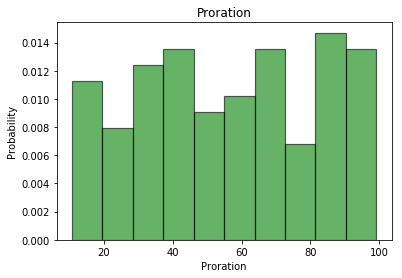

In [29]:
n, bins, patches = plt.hist(proration, 10, density=1, facecolor='green', linewidth = 1.2, edgecolor = 'black', alpha = 0.6)
plt.xlabel("Proration")
plt.ylabel('Probability')
plt.title('Proration')
plt.show()

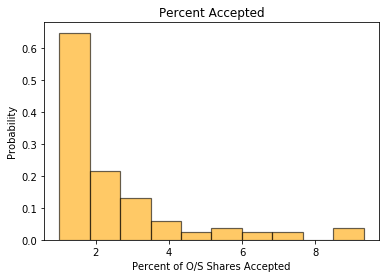

In [30]:
n, bins, patches = plt.hist(pct_accepted, 10, density=1, facecolor='orange', linewidth = 1.2, edgecolor = 'black', alpha = 0.6)
plt.xlabel("Percent of O/S Shares Accepted")
plt.ylabel('Probability')
plt.title('Percent Accepted')
plt.show()

In [31]:
ticker = 'RAMP US EQUITY'
shareholders_summary = bbgclient.bbgclient.get_secid2field([ticker],"tickers",["ALL_HOLDERS_PUBLIC_FILINGS"], req_type='refdata')

holder_name, portfolio_name, inst_type, insider_status, filing_dt, filing_source, pct_out, position, position_chg = [], [], [], [], [], [], [], [], []

for i in shareholders_summary[ticker]['ALL_HOLDERS_PUBLIC_FILINGS']:
    holder_name.append(i['Holder Name '])
    portfolio_name.append(i['Portfolio Name '])
    inst_type.append(i['Institution Type '])
    insider_status.append(i['Insider Status '])
    filing_dt.append(i['Filing Date  '])
    filing_source.append(i['Filing Source '])
    pct_out.append(i['Percent Outstanding'])
    position.append(i['Position '])
    position_chg.append(i['Position Change  '])
    
shareholder_summary_df = shareholders_summary_df = pd.DataFrame()

shareholder_summary_df["Holder Name"] = holder_name
shareholder_summary_df["Portfolio Name"] = portfolio_name
shareholder_summary_df["Institution Type"] = inst_type
shareholder_summary_df["Insider Status"] = insider_status
shareholder_summary_df["Filing Date"] = filing_dt
shareholder_summary_df["Filing Source"] = filing_source
shareholder_summary_df["Percent Outstanding"] = [float(i) for i in pct_out]
shareholder_summary_df["Position"] = [float(i) for i in position]
shareholder_summary_df["Position Change"] = [float(i) for i in position_chg]

shareholder_summary_df = shareholder_summary_df.drop_duplicates()
shareholder_summary_df = shareholder_summary_df[shareholder_summary_df["Percent Outstanding"] != 0]
shareholder_summary_df

,Holder Name,Portfolio Name,Institution Type,Insider Status,Filing Date,Filing Source,Percent Outstanding,Position,Position Change
0,BlackRock Inc,n/a,Investment Advisor,N-P,2018-12-31,13G,12.49,8520819.0,0.0
15,Jackson Square Partners LLC,n/a,Investment Advisor,N-P,2018-12-31,13G,10.76,7339769.0,0.0
30,Vanguard Group Inc/The,n/a,Investment Advisor,N-P,2018-12-31,ULT-AGG,9.21,6287089.0,0.0
45,Capital Group Cos Inc/The,Capital Group Cos Inc/The,Investment Advisor,N-P,2018-12-31,13F,4.78,3262400.0,849300.0
60,Dimensional Fund Advisors LP,Dimensional Fund Advisors LP,Investment Advisor,N-P,2018-12-31,13F,4.49,3066256.0,-93069.0
75,Manning & Napier Group LLC,Manning & Napier Group LLC,Investment Advisor,N-P,2018-12-31,13F,4.04,2758720.0,2758720.0
90,State Street Corp,n/a,Investment Advisor,N-P,2018-12-31,ULT-AGG,3.27,2230231.0,-314999.0
105,Abrams Bison Investments LLC,Abrams Bison Investments LLC,Hedge Fund Manager,N-P,2018-12-31,13F,3.10,2112000.0,-343000.0
120,Millennium Management LLC/NY,Millennium Management LLC/NY,Hedge Fund Manager,N-P,2018-12-31,13F,3.07,2094935.0,2094935.0
135,Northern Trust Corp,Northern Trust Corp,Investment Advisor,N-P,2018-12-31,13F,2.64,1799115.0,410790.0
